In [2]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import Packages
import pandas as pd
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
dv_url = (
    "https://www.ncei.noaa.gov/access/services/data/v1?"
    "dataset=daily-summaries&"
    "stations=USC00042319&"
    "dataTypes=TOBS&"
    "startDate=1990-01-01&"
    "endDate=2024-12-31&"
    "units=metric" # this here will get me the data in celsius
)

dv_url



'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USC00042319&dataTypes=TOBS&startDate=1990-01-01&endDate=2024-12-31&units=metric'

In [4]:


# Download the climate data using the url
dv_df = pd.read_csv(
    dv_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check if the data was downloaded
dv_df.head()

,STATION,TOBS
DATE,,
1990-01-01,USC00042319,5.0
1990-01-02,USC00042319,10.0
1990-01-03,USC00042319,10.6
1990-01-04,USC00042319,0.6
1990-01-05,USC00042319,0.6


In [11]:

# selecting the column for temperature at time of observation and 
# reassign to the dataframe.
dv_df = dv_df[['TOBS']]
dv_df

,TOBS
DATE,
1990-01-01,5.0
1990-01-02,10.0
1990-01-03,10.6
1990-01-04,0.6
1990-01-05,0.6
...,...
2024-12-27,NaN
2024-12-28,NaN
2024-12-29,NaN


In [14]:
# Resample data to obtain the mean annual temperature.
ann_dv_df = dv_df.resample('YS').mean()
ann_dv_df.head()

,TOBS
DATE,
1990-01-01,20.107713
1991-01-01,19.918539
1992-01-01,21.048087
1993-01-01,20.397802
1994-01-01,21.449863


In [15]:
# Plot the annual data interactively
ann_dv_df_plot = ann_dv_df.hvplot(y='TOBS',
    title=' Mean Annual Temperature (C) of \nDeath Valley National Park, USA',
    xlabel='Year',
    ylabel='Mean Annual Temperature (Celsius)'
    )

ann_dv_df_plot

:Curve   [DATE]   (TOBS)

In [20]:
# Fitting an OLS Linear Regression to the data

# Drop NaN values
ann_dv_df_new = ann_dv_df.dropna()

# Reshape 'Year' column to be a 2D array for scikit-learn
X = ann_dv_df_new.index.values.reshape(-1,1)
Y = ann_dv_df_new['TOBS'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the slope to understand the average warming per year
slope = model.coef_[0]


# get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_


#print the results
print(f"Slope: {slope}")
print(f"Intercept:{intercept}")

Slope: 3.791109956725465e-18
Intercept:17.779294967430808


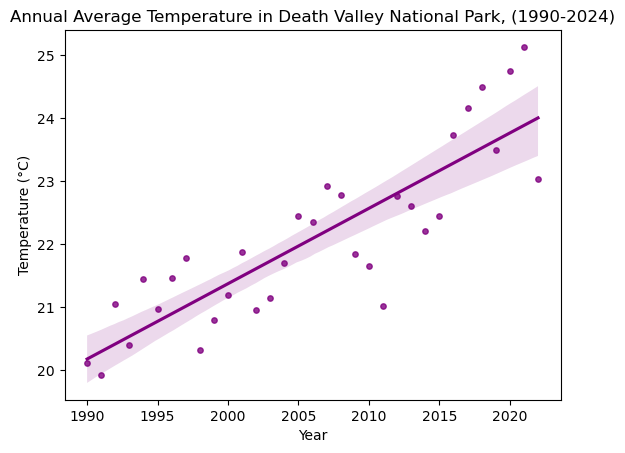

In [29]:
# Plot annual average temperature with a trend line
dvnp_plot = sns.regplot(
    x = ann_dv_df_new.index.year, 
    y = ann_dv_df_new.TOBS, 
    scatter_kws={"s": 15, "color": "purple"},   # points
    line_kws={"color": "purple"}                # trend line
)

# Set plot labels
dvnp_plot.set(
   title="Annual Average Temperature in Death Valley National Park, (1990-2024)",
    xlabel="Year",
    ylabel="Temperature (°C)"
)
# Display the plot without extra text
plt.show()